<a href="https://colab.research.google.com/github/Taylor-X01/Optimization-Algorithms/blob/main_project/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

Hypothesis match : Success
[x*,f(x*)] =  [-2.51953125, -4.2496185302734375]


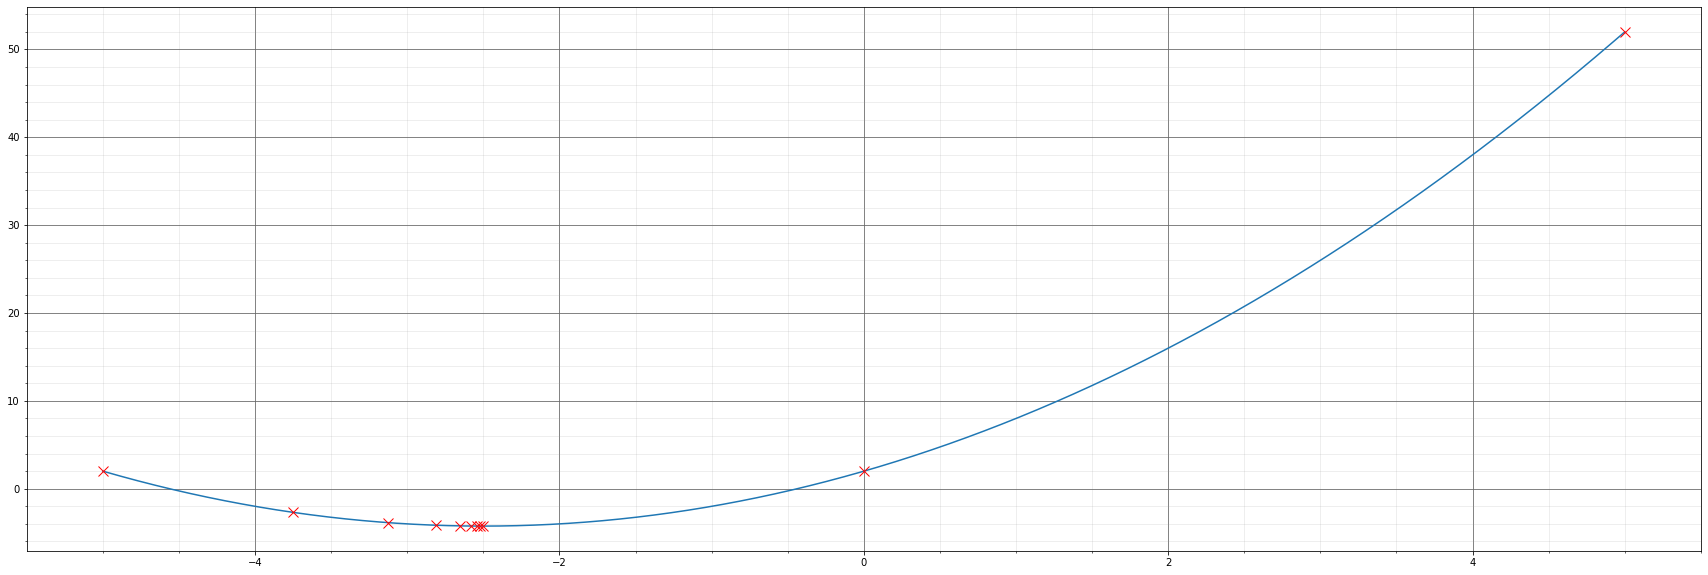

[-3.696959722403599, 0.8413048157650121]


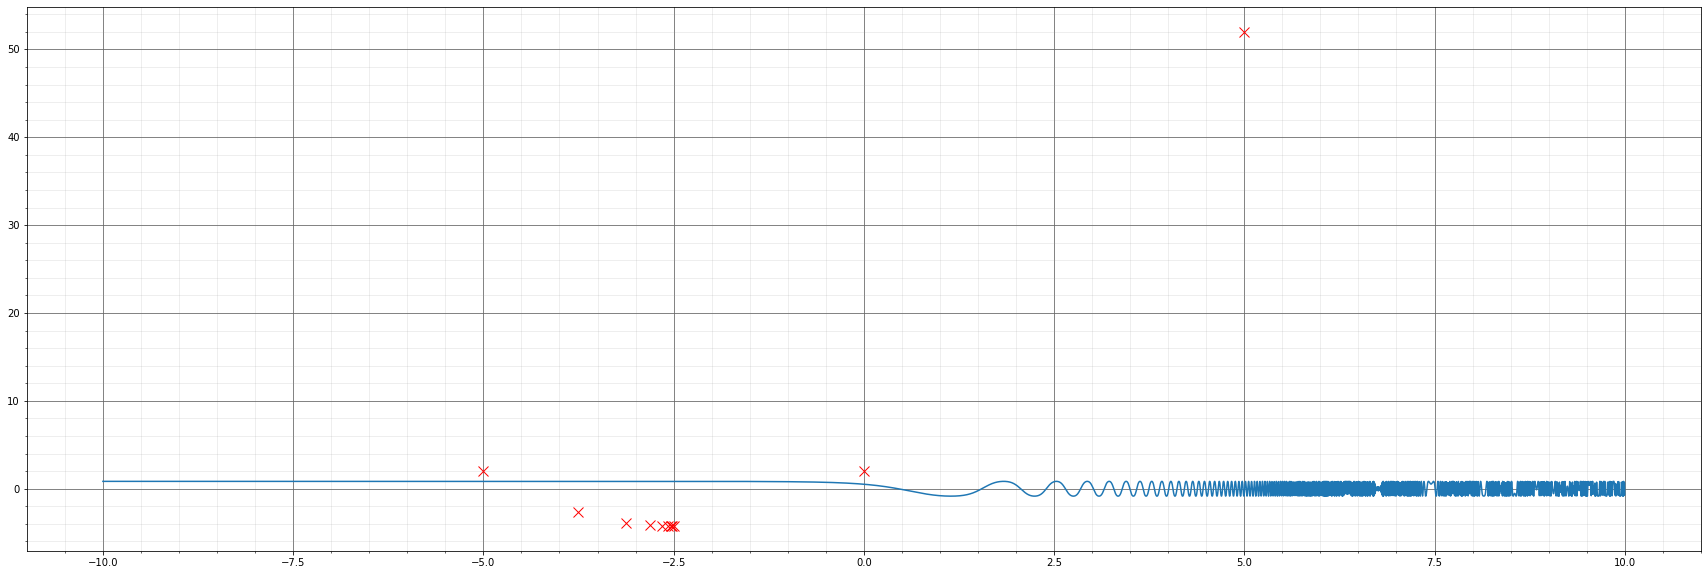

[[1, -2.4996888756660747], [8, -4.2499999032016476]]
[x*,f(x*)] =  [-2.4996888756660747, -4.2499999032016476]


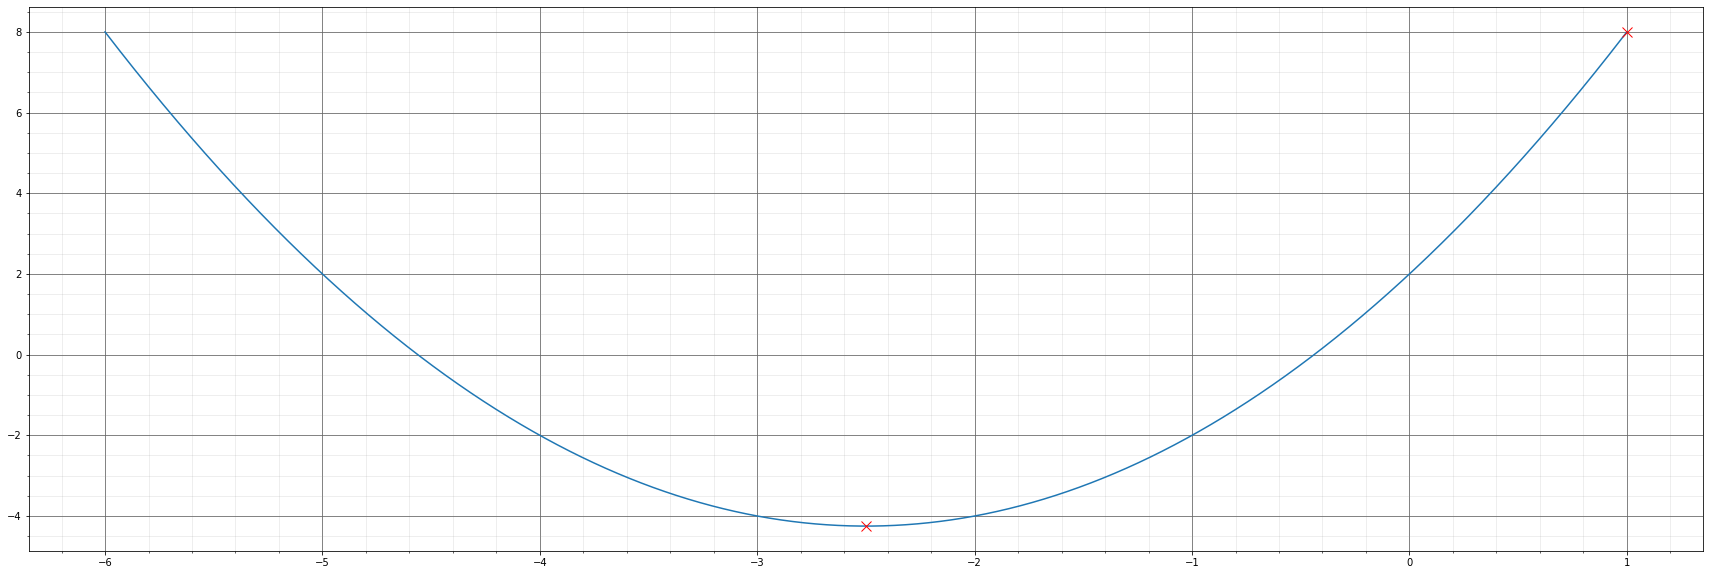

[-2.499999995559108, -4.25]
[[2, 2.5, -2.499999995559108], [16, 20.75, -4.25]]
[x*,f(x*)] [-2.499999995559108, -4.25]


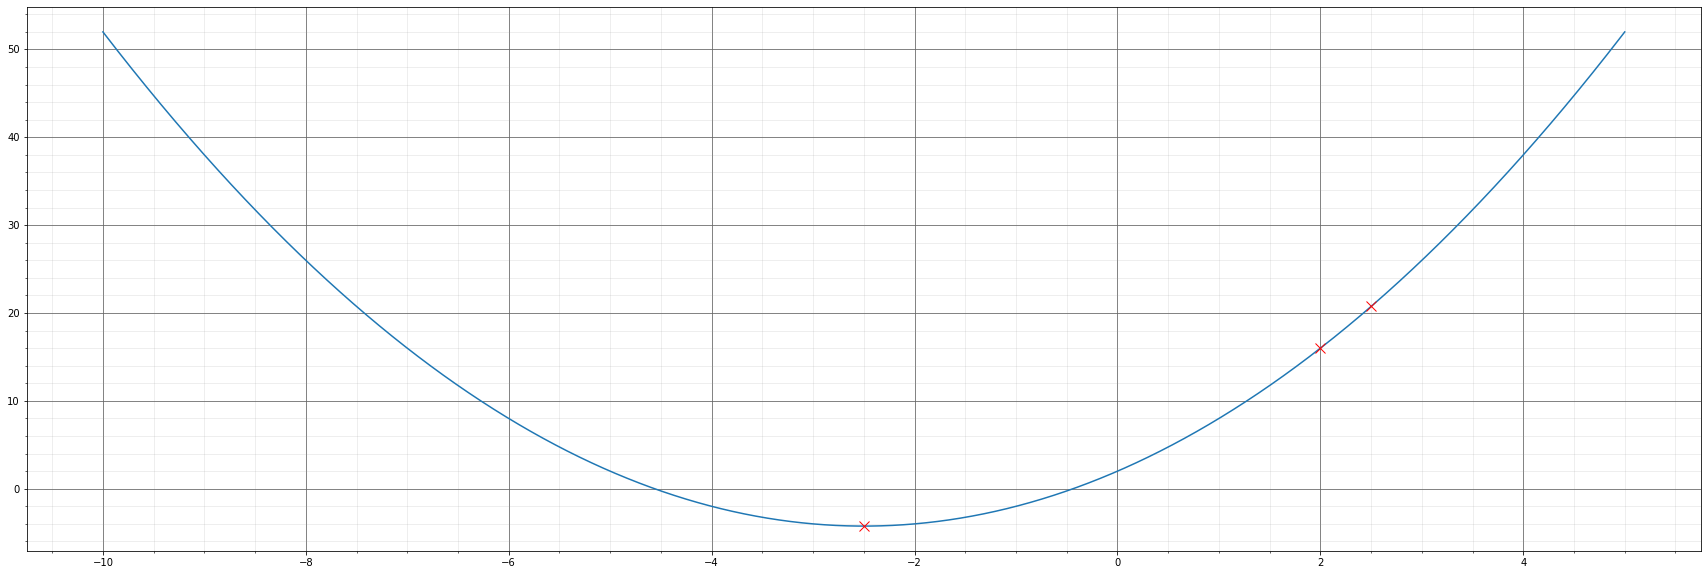




 ~~> Newton's Method 

f(x*=1.1448007811060728) = -0.8414709714058314



 ~~> Bissection's Method

Hypothesis match : Success
f(x*=1.1455078125) = -0.8414693699937836



 ~~> Bissection-Newton's Method



Bissection :

Hypothesis match : Success


Newton : 

f(x*=1.1447335066527746) = -0.8414709847729408


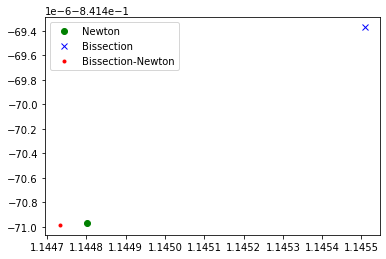

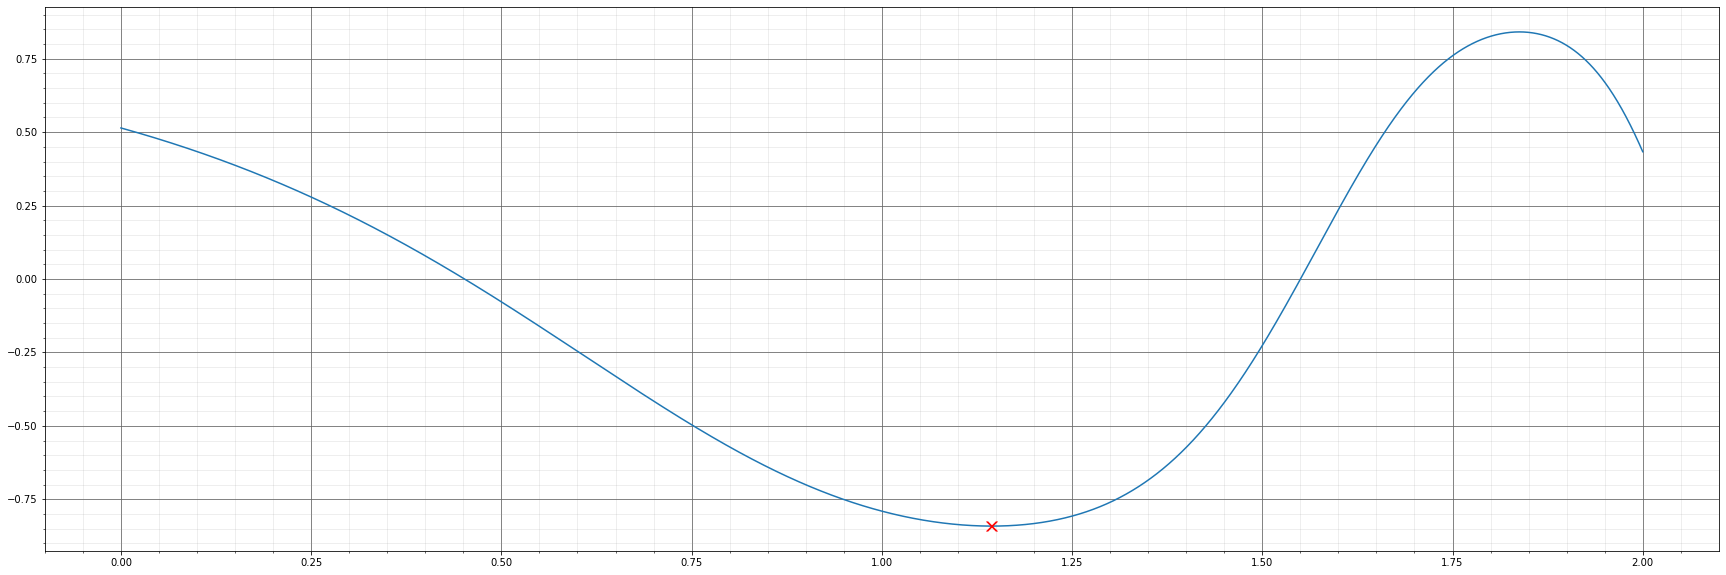

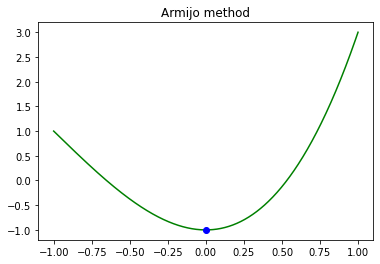

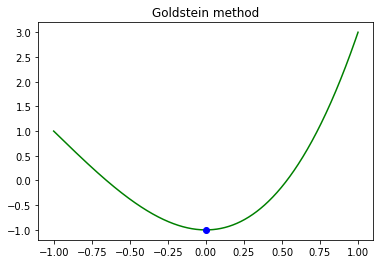

SyntaxError: ignored

In [58]:
# !pip install numdifftools
%run '/content/drive/MyDrive/Colab Notebooks/Line_search.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/Backtracking_NEW.ipynb'

from sympy import *
from sympy.abc import x,y,alpha
from autograd import *
from scipy.misc import derivative
import numpy as np
from numdifftools import Gradient
from scipy.linalg import norm
import matplotlib.pyplot as plt
from sympy.plotting import plot3d

dx = 1e-6

In [59]:
def gradient_descent(fct, x_0,alpha0, err,Armijo=False,Goldstein=False,Wolfe=False):
 
  z_k = x_0 # x_0 is a list of initial values 
  d = Gradient(fct)
  
  cpt1 = 0 
  while abs(norm(d(z_k),ord=1)) > err:
    # print("Here 1 :--->", type(z_k))
    print("compteur : ",cpt1)
    phi = lambda alpha: fct(z_k - alpha*d(z_k))

    if Armijo:
      print("Armijo's Method")
      condid_alpha = armijo(phi)
    elif Goldstein: 
      print("Goldstein's Method")
      condid_alpha = goldstein(phi)
    elif Wolfe:
      # condid_alpha = wolf(phi)
      pass
    else : condid_alpha = bissection_newton(phi,-0.1,0.1,err=.0005)[0][-1]
    alpha = max(0, condid_alpha)

    z_k = (z_k - alpha*d(z_k))
    print("Gradient_fct(z_k): ",abs(norm(d(z_k),ord=1)))
    print("z_k = ",z_k,"\nf(z_k) = ",fct(z_k))
    cpt1 +=1
    # d = list(gradient(*z_k).values())
  return z_k

## Benchmark function :

In [60]:

booth_fct = lambda X:((X[0]+2*X[1]-7)**2) + ((2*X[0]+X[1]-5)**2) ## Booth Function

ackley_n2_fct = lambda X: -200*np.exp(-0.2*np.sqrt(np.sum(np.power(X,2)))) ## Ackley N2 Function

ackley_fct = lambda X: (-20 * np.exp(-0.2 * np.sqrt( (1/2)*np.sum(np.power(X,2)) ) ) - np.exp( (1/2) * np.sum(np.cos(2*np.pi*X)) ) +20+np.exp(1)) ## General form Ackley Function

himmelblau_fct = lambda X: ((X[0]**2) + X[1] - 11)**2 + (X[0] + (X[1]**2) - 7)**2

sphere_function = lambda X : np.sum(X**2)

sixhump_camel_fct = lambda X : (4-2.1*(X[0]**2)+(X[0]**2)/3)*(X[0])**2 +  X[0]*X[1]  + (-4 + 4*(X[1]**2))*(X[1]**2)

gradient_descent(sixhump_camel_fct,[-1,1],0.1,err=0.04,Goldstein=True)
#-------------------------------------------#



  # With approached step lenght {Armijo} : [x*,f(x*)]=[1.00006104, 3.00006104] ; compteur=4
  # With approached step lenght {Goldstein} : [x*,f(x*)]=[1.00006104, 3.00006104] ; compteur=4
  # With exact step lenght {Newton} : [x*,f(x*)] = [1., 3.] ; compteur=0

# plot3d(-200*exp(-0.2*sqrt((x**2)+(y**2))), (x, -63.00892216,-64.00892216), (y, -44.10624551,-45.10624551))

# plot3d(((x+2*y-7)**2) + ((2*x+y-5)**2),(x, -10,10), (y, -10,10))

compteur :  0
Goldstein's Method
Gradient_fct(z_k):  0.501802453462574
z_k =  [-1.00208333  0.78125   ] 
f(z_k) =  0.5010813332307291
compteur :  1
Goldstein's Method
Gradient_fct(z_k):  0.3466694230224528
z_k =  [-0.99430263  0.75766805] 
f(z_k) =  0.4963915742566123
compteur :  2
Goldstein's Method
Gradient_fct(z_k):  10.550070371433335
z_k =  [-0.24375146  1.04712515] 
f(z_k) =  0.3992952630884904
compteur :  3
Goldstein's Method
Gradient_fct(z_k):  1.323374410125023
z_k =  [-0.21873446  0.74245245] 
f(z_k) =  -0.9645646305007514
compteur :  4
Goldstein's Method
Gradient_fct(z_k):  0.425465420357087
z_k =  [-0.1020509   0.69371421] 
f(z_k) =  -1.0279203848448506
compteur :  5
Goldstein's Method
Gradient_fct(z_k):  0.04205354860258325
z_k =  [-0.09485199  0.71310688] 
f(z_k) =  -1.0315045494319801
compteur :  6
Goldstein's Method
Gradient_fct(z_k):  0.0036606761426530247
z_k =  [-0.08989217  0.71281001] 
f(z_k) =  -1.0316066686260088


array([-0.08989217,  0.71281001])

In [61]:
ackeley_N2_phi = lambda alpha : -200*np.exp(-0.2*np.sqrt( ((1-alpha*-6.28187826e-06)**2) + (2-alpha*-6.28187826e-06)**2) )
d = Gradient(ackeley_N2_phi)
print(d([1.,0.7]))

[[0.00021556 0.        ]
 [0.         0.00021556]]
